<a href="https://colab.research.google.com/github/kunarushi/Project_pesticide_recommender/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -d /content/drive/My\ Drive/datax/ /content/drive/My\ Drive/projectx.zip

Archive:  /content/drive/My Drive/projectx.zip
   creating: /content/drive/My Drive/datax/project/asiatic rice borer/
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/1 - Copy (2).jpg  
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/1 - Copy (3).jpg  
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/1 - Copy (4).jpg  
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/1 - Copy.jpg  
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/1.jpg  
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/10 - Copy (2).jpg  
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/10 - Copy (3).jpg  
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/10 - Copy (4).jpg  
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/10 - Copy.jpg  
  inflating: /content/drive/My Drive/datax/project/asiatic rice borer/10.jpg  
  inflating: /con

In [4]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.1 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_dir='/content/drive/My Drive/datax/project'
testing_dir='/content/drive/My Drive/data/test'

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
      )

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=128
)

validation_generator = validation_datagen.flow_from_directory(
	testing_dir,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=128
)

Found 4230 images belonging to 10 classes.
Found 1015 images belonging to 10 classes.


In [6]:

base_model = tf.keras.applications.MobileNetV2(include_top=False,
                                weights='imagenet',
                                input_shape=(224,224,3))
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

for layer in base_model.layers:
    layer.trainable = False


9406464/9406464 [==============================] - 0s 0us/step


In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [8]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=20, validation_data = validation_generator, verbose = 1, callbacks=[callbacks])
model.save('/content/drive/My Drive/ts.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dropout (Dropout)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 128)               8028288   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 10,287,562
Trainable params: 8,029,578
Non-trainable params: 2,257,984
_____________________________________

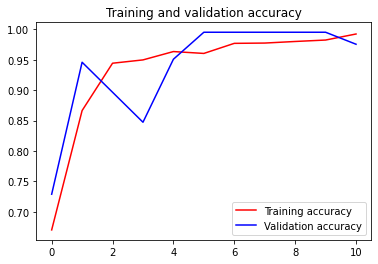

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [10]:
import pandas as pd
pesticide={
    'pest':['asiatic rice borer','black cutworm','mole cricket','paddy stem maggot','red spider','rice gall midge','rice leafhopper','rice water weevil','small brown plant hopper','wireworm'],
    'remedy':['Spray products containing chlorantraniliprole','Products containing chlorpyrifos, beta-methrin, delta methrin','Spray Sevin Insect Killer','Spray Cartap Hydrochloride','Spray wettable sulphur 50','Spray Phosalone','Spray Phosphamidon','Spray Lambda-cyhalothrin, diflubenzuron','Spray buprofezin, pymetrozine','Spray Pyrethrin']
}

df=pd.DataFrame(pesticide,columns=['pest','remedy'],index=[0,1,2,3,4,5,6,7,8,9])
print(df)

                       pest                                             remedy
0        asiatic rice borer      Spray products containing chlorantraniliprole
1             black cutworm  Products containing chlorpyrifos, beta-methrin...
2              mole cricket                          Spray Sevin Insect Killer
3         paddy stem maggot                         Spray Cartap Hydrochloride
4                red spider                          Spray wettable sulphur 50
5           rice gall midge                                    Spray Phosalone
6           rice leafhopper                                 Spray Phosphamidon
7         rice water weevil            Spray Lambda-cyhalothrin, diflubenzuron
8  small brown plant hopper                      Spray buprofezin, pymetrozine
9                  wireworm                                    Spray Pyrethrin


In [18]:
import numpy as np
from google.colab import files
from keras_preprocessing import image
from tensorflow.keras.models import load_model
model=load_model('/content/drive/My Drive/ts.h5')
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x=x/255.0
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=128)
  print(fn)
  print(classes)
  print(classes)
  print('pest:')
  print(df.loc[np.argmax(classes)]['pest'])
  print('Pesticide:')
  print(df.loc[np.argmax(classes)]['remedy'])

Saving 82 - Copy (2).jpg to 82 - Copy (2) (2).jpg
1/1 [==============================] - 1s 1s/step
82 - Copy (2).jpg
[[1.6995565e-14 2.3386154e-24 1.0000000e+00 4.2020216e-23 6.2381657e-27
  1.3667139e-21 3.0338541e-28 3.1261518e-19 9.2571309e-32 9.6966125e-33]]
[[1.6995565e-14 2.3386154e-24 1.0000000e+00 4.2020216e-23 6.2381657e-27
  1.3667139e-21 3.0338541e-28 3.1261518e-19 9.2571309e-32 9.6966125e-33]]
pest:
mole cricket
Pesticide:
Spray Sevin Insect Killer
